![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción producción de toneladas de café diaria**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

In [1]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

matplotlib.font_manager WARNING Matplotlib is building the font cache; this may take a moment.
matplotlib.font_manager INFO  Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)
matplotlib.font_manager INFO  generated new fontManager
/home/danielcardenas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/home/danielcardenas/MAD/MAD/Series de Tiempo/Proyecto/base ajustada.csv'
df = pd.read_csv(file_path)
df

,FECHA_CORTE,Ingresos,Deterioro
0,31/01/2016,12556235614,456212289
1,29/02/2016,11948803346,426440399
2,31/03/2016,12124055034,507291741
3,30/04/2016,12268361877,132621564
4,31/05/2016,22885166819,488187217
...,...,...,...
99,30/04/2024,27195720063,11441164891
100,31/05/2024,23126998775,86331878
101,30/06/2024,29758712102,95378649
102,31/07/2024,36122438899,113647065


In [16]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA_CORTE  104 non-null    datetime64[ns]
 1   Ingresos     104 non-null    int64         
 2   Deterioro    104 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.6 KB


In [15]:
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])

/tmp/ipykernel_24551/2928885864.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])


In [17]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['FECHA_CORTE'] # Definir la columna fecha como index
df.drop(columns=['FECHA_CORTE'],inplace=True) # Eliminar la columna fecha
df

,Ingresos,Deterioro
FECHA_CORTE,,
2016-01-31,12556235614,456212289
2016-02-29,11948803346,426440399
2016-03-31,12124055034,507291741
2016-04-30,12268361877,132621564
2016-05-31,22885166819,488187217
...,...,...
2024-04-30,27195720063,11441164891
2024-05-31,23126998775,86331878
2024-06-30,29758712102,95378649


In [42]:
df_Ingresos = df.copy()
df_Ingresos = df_Ingresos.drop(['Deterioro'], axis = 1)
df_Ingresos

,Ingresos
FECHA_CORTE,
2016-01-31,12556235614
2016-02-29,11948803346
2016-03-31,12124055034
2016-04-30,12268361877
2016-05-31,22885166819
...,...
2024-04-30,27195720063
2024-05-31,23126998775
2024-06-30,29758712102


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

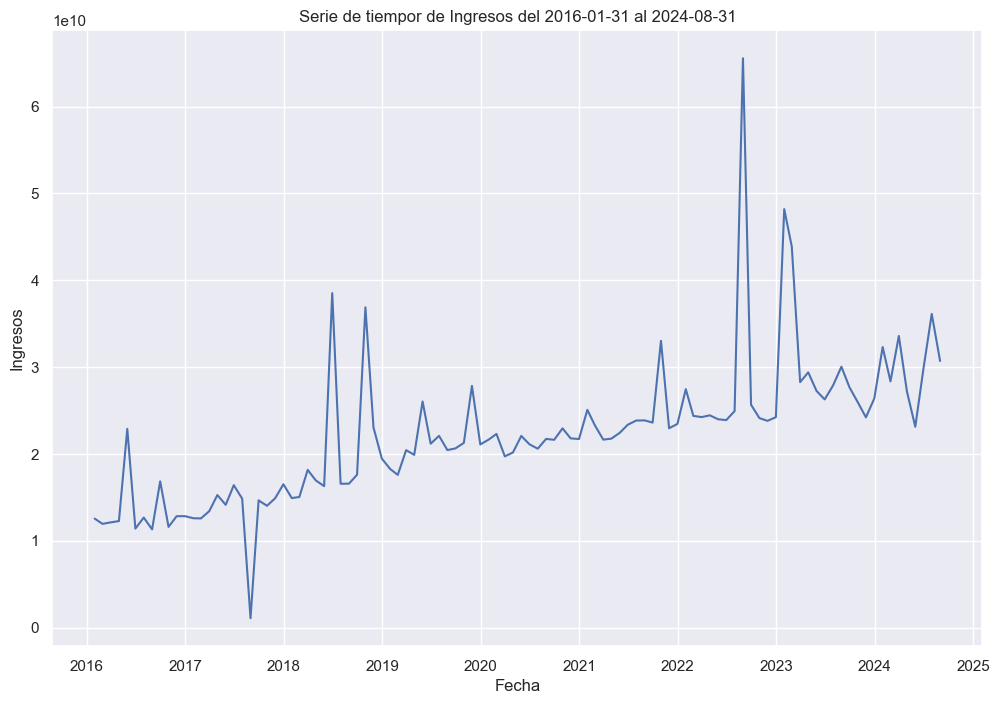

In [43]:
serie_de_tiempo(df_Ingresos,'Ingresos')

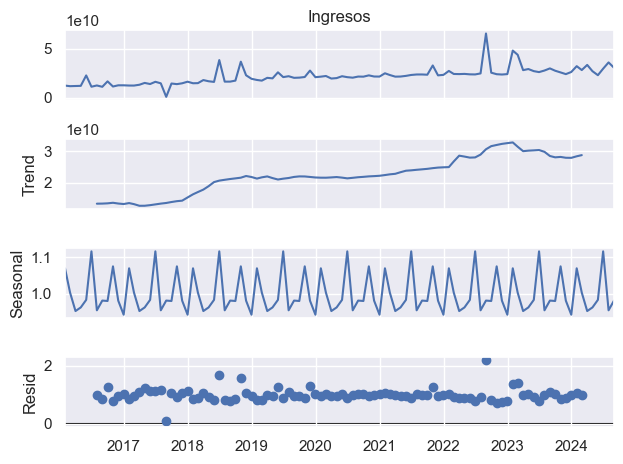

In [44]:
Serie_decompuesta = seasonal_decompose (df_Ingresos['Ingresos'],model = 'multiplicative')
grafico1 = Serie_decompuesta.plot()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins

![Metodología Box Jenkinks](attachment:image.png)


## Identificación

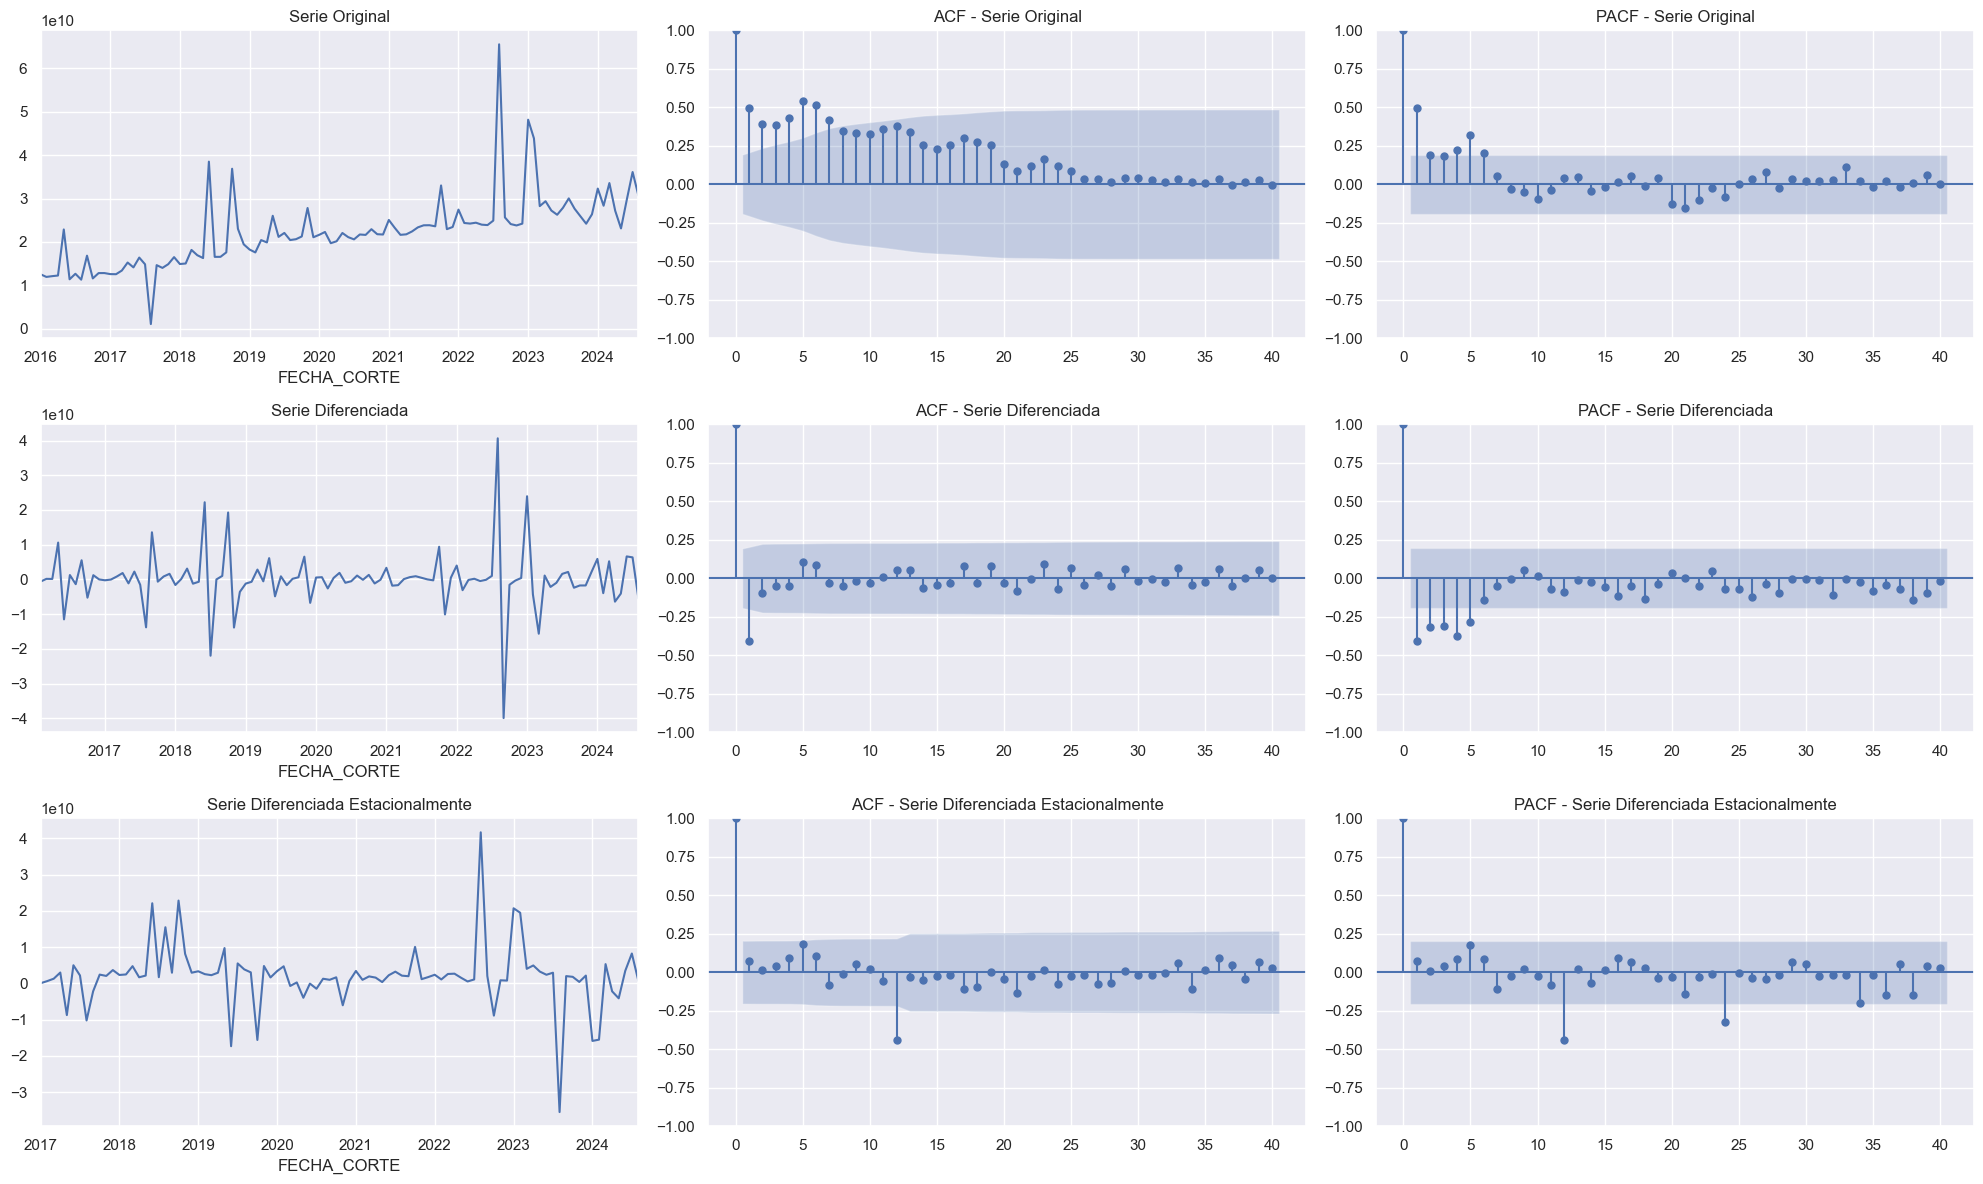

In [45]:
plot_time_series_analysis(df_Ingresos,'Ingresos')

In [46]:
# prueba de Dickey Fuller para las series

from statsmodels.tsa.stattools import adfuller

SerieOriginal_adf = adfuller(df_Ingresos['Ingresos'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.1958180173398592
p-value: 0.6753921030298975
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157


In [47]:
SerieDiferenciada_adf = adfuller(df_Ingresos['Ingresos'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -9.434041132684841
p-value: 5.098851722474728e-16
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157


In [48]:
SerieDiferenciadaEst_adf = adfuller(df_Ingresos['Ingresos'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.027039360921503
p-value: 0.0012753588961435397
Critical Values:
	1%: -3.5148692050781247
	5%: -2.8984085156250003
	10%: -2.58643890625


In [49]:
Entrenamiento_df= df_Ingresos[:92]
Prueba_df= df_Ingresos[92:]

display(Prueba_df,Entrenamiento_df)

,Ingresos
FECHA_CORTE,
2023-09-30,27669222104
2023-10-31,25937168241
2023-11-30,24213570242
2023-12-31,26384328985
2024-01-31,32307147290
2024-02-29,28356799879
2024-03-31,33581415293
2024-04-30,27195720063
2024-05-31,23126998775


,Ingresos
FECHA_CORTE,
2016-01-31,12556235614
2016-02-29,11948803346
2016-03-31,12124055034
2016-04-30,12268361877
2016-05-31,22885166819
...,...
2023-04-30,29392342046
2023-05-31,27246901653
2023-06-30,26276359798


In [50]:
!pip install pmdarima
import pmdarima as pm

modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='bic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

/bin/bash: línea 1: pip: orden no encontrada


Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=3889.309, Time=0.34 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=3863.711, Time=0.83 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=3841.765, Time=0.35 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=3860.228, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=3844.514, Time=0.82 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=3844.795, Time=1.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=3842.585, Time=0.99 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=3848.784, Time=3.49 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=3868.511, Time=0.48 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=3845.788, Time=0.73 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=3844.798, Time=0.66 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=3860.657, Time=0.36 sec
 ARIMA(1,1,2)(0,1,1)[12]             : BIC=3849.103, Time=1.31 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : BIC=3853.032, Time=1.40 sec

Best model:  ARIMA

In [51]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   92
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1914.328
Date:                            sáb, 02 nov 2024   AIC                           3834.657
Time:                                    21:22:37   BIC                           3841.765
Sample:                                01-31-2016   HQIC                          3837.505
                                     - 08-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8463      0.130     -6.485      0.000      -1.102      -0.591
ma.S.L12      -0.6608      0.143     -4.635      0.000      -0.940      -0.381
sigma2      9.228e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               661.76
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                             2.92
Prob(H) (two-sided):                  0.05   Kurtosis:                        15.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## Predicción


In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_SM = SARIMAX(Entrenamiento_df,order=(0,1,1),seasonal=(0,1,1,12))
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Ingresos   No. Observations:                   92
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2188.984
Date:                sáb, 02 nov 2024   AIC                           4381.969
Time:                        21:23:39   BIC                           4386.991
Sample:                    01-31-2016   HQIC                          4383.995
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8375      0.081    -10.290      0.000      -0.997      -0.678
sigma2      5.263e+19   8.25e-22   6.38e+40      0.000    5.26e+19    5.26e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1012.56
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             3.24
Prob(H) (two-sided):                  0.01   Kurtosis:                        18.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [53]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=12).predicted_mean
print ( Pr_stmodels)

2023-09-30    2.994331e+10
2023-10-31    2.994331e+10
2023-11-30    2.994331e+10
2023-12-31    2.994331e+10
2024-01-31    2.994331e+10
2024-02-29    2.994331e+10
2024-03-31    2.994331e+10
2024-04-30    2.994331e+10
2024-05-31    2.994331e+10
2024-06-30    2.994331e+10
2024-07-31    2.994331e+10
2024-08-31    2.994331e+10
Freq: ME, Name: predicted_mean, dtype: float64


In [57]:
!pip install skforecast
from skforecast.Sarimax import Sarimax


modelo_SK = Sarimax(order=(0,1,1),seasonal_order=(0,1,1,12))
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()


/bin/bash: línea 1: pip: orden no encontrada


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Ingresos   No. Observations:                   92
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1914.328
Date:                            sáb, 02 nov 2024   AIC                           3834.657
Time:                                    21:24:39   BIC                           3841.765
Sample:                                01-31-2016   HQIC                          3837.505
                                     - 08-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8463      0.130     -6.485      0.000      -1.102      -0.591
ma.S.L12      -0.6608      0.143     -4.635      0.000      -0.940      -0.381
sigma2      9.228e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               661.76
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                             2.92
Prob(H) (two-sided):                  0.05   Kurtosis:                        15.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [58]:
Pr_skforecast = modelo_SK.predict(steps=12)
print(Pr_skforecast)

                    pred
2023-09-30  2.877471e+10
2023-10-31  3.173077e+10
2023-11-30  2.897920e+10
2023-12-31  2.845442e+10
2024-01-31  3.819002e+10
2024-02-29  3.577980e+10
2024-03-31  3.030453e+10
2024-04-30  3.076604e+10
2024-05-31  3.082074e+10
2024-06-30  3.099024e+10
2024-07-31  3.083853e+10
2024-08-31  4.023946e+10


In [59]:
modelo_PD = pm.ARIMA(order=(0,1,1),seasonal_order=(0,1,1,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   92
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1917.777
Date:                            sáb, 02 nov 2024   AIC                           3843.554
Time:                                    21:24:51   BIC                           3853.032
Sample:                                01-31-2016   HQIC                          3847.352
                                     - 08-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.697e+08   3.21e-11  -1.46e+19      0.000    -4.7e+08    -4.7e+08
ma.L1         -0.6700      0.128     -5.221      0.000      -0.922      -0.418
ma.S.L12      -0.5413      0.103     -5.233      0.000      -0.744      -0.339
sigma2      9.218e+19   5.23e-22   1.76e+41      0.000    9.22e+19    9.22e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):               382.63
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                             2.25
Prob(H) (two-sided):                  0.02   Kurtosis:                        12.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [60]:
Pr_pmdarima = modelo_PD.predict(steps=12)
print(Pr_pmdarima)

2023-09-30    2.064580e+10
2023-10-31    2.217578e+10
2023-11-30    1.832445e+10
2023-12-31    1.705250e+10
2024-01-31    2.851505e+10
2024-02-29    2.453664e+10
2024-03-31    1.610445e+10
2024-04-30    1.567754e+10
2024-05-31    1.408403e+10
2024-06-30    1.288551e+10
Freq: ME, dtype: float64


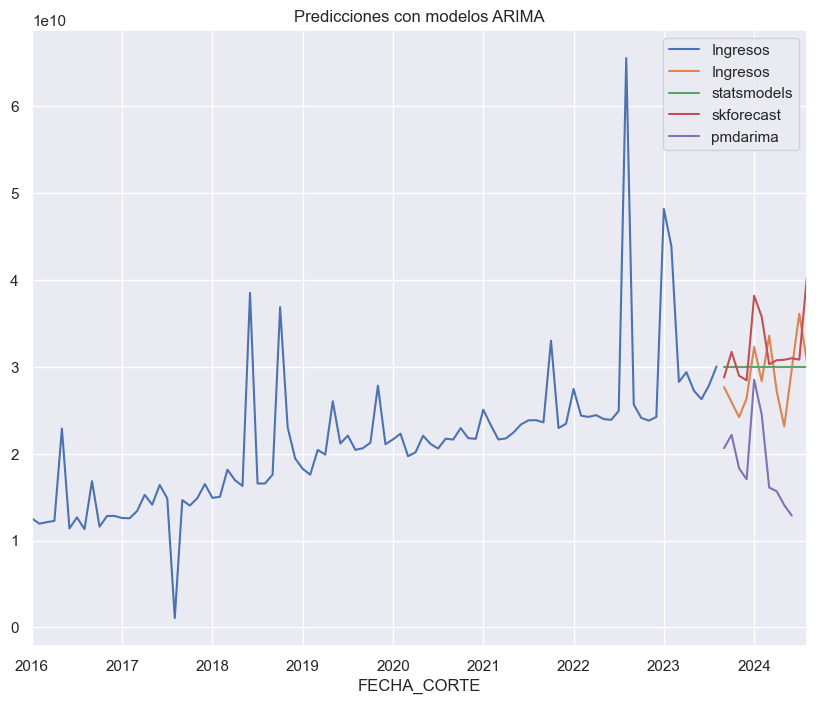

In [61]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

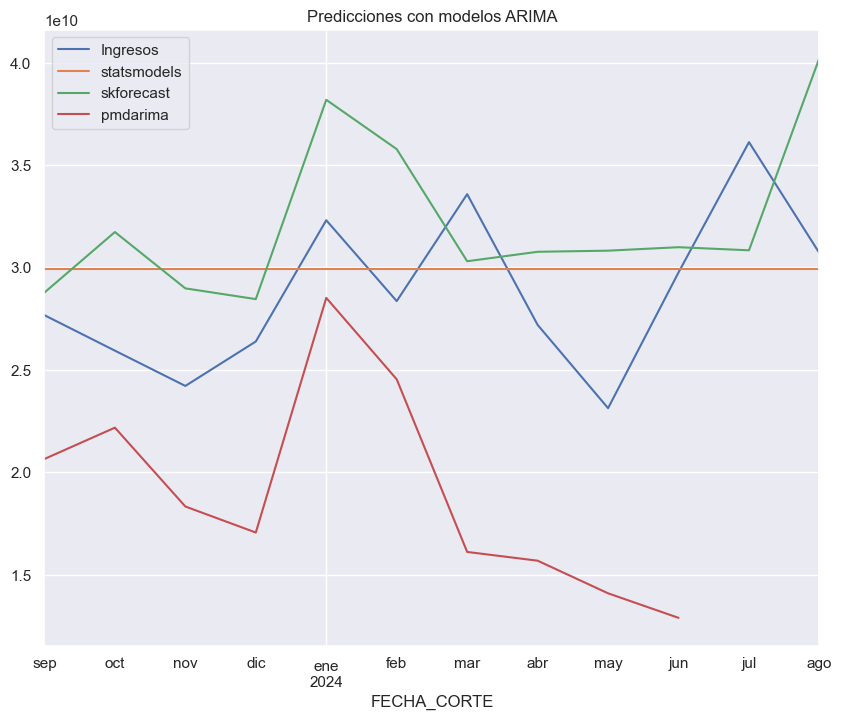

In [62]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [64]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Ingresos"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Ingresos'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Ingresos'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Ingresos'], Pr_skforecast)*100:.2f}%")

MAE 4803048350.46
MSE: 29550927744205737984.00
RMSE: 5436076502.79
MAPE: 17.02%


In [65]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Ingresos"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Ingresos'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Ingresos'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Ingresos'], Pr_stmodels)*100:.2f}%")

MAE 3320138682.21
MSE: 15071419577804716032.00
RMSE: 3882192625.03
MAPE: 12.03%


In [68]:
Pr_skforecast1 = Pr_skforecast.copy()
Pr_skforecast1 = modelo_SK.predict(steps=12)
print(Pr_skforecast1)

                    pred
2023-09-30  2.877471e+10
2023-10-31  3.173077e+10
2023-11-30  2.897920e+10
2023-12-31  2.845442e+10
2024-01-31  3.819002e+10
2024-02-29  3.577980e+10
2024-03-31  3.030453e+10
2024-04-30  3.076604e+10
2024-05-31  3.082074e+10
2024-06-30  3.099024e+10
2024-07-31  3.083853e+10
2024-08-31  4.023946e+10


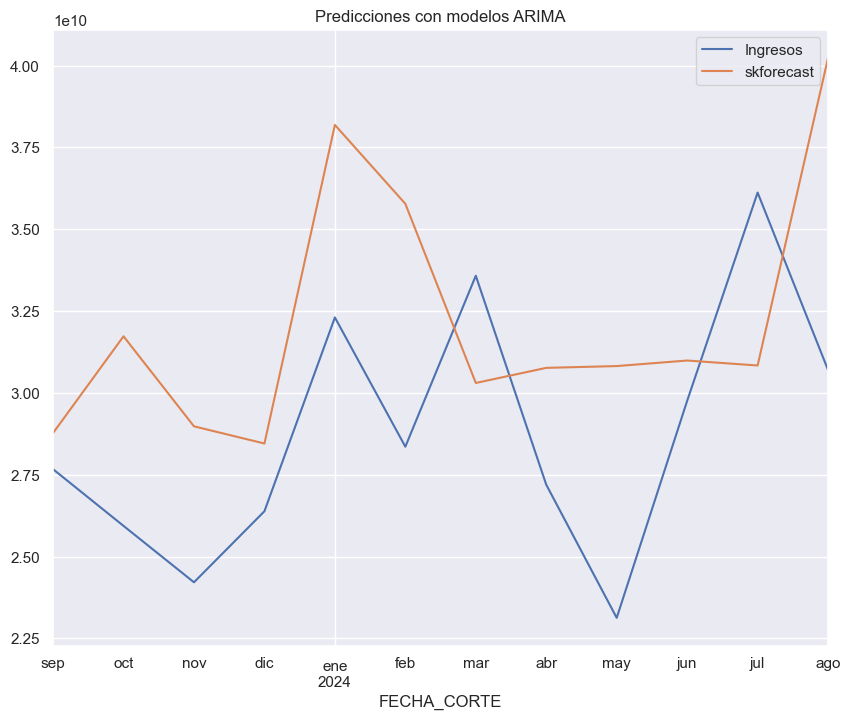

In [69]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast1.columns = ['skforecast']
Pr_skforecast1.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


In [89]:
modelo = SimpleExpSmoothing(df_s['Ingresos']).fit(optimized = True,use_brute = True)
alpha = modelo.params['smoothing_level']
print (alpha)

0.15465116279069768


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='FECHA_CORTE'>

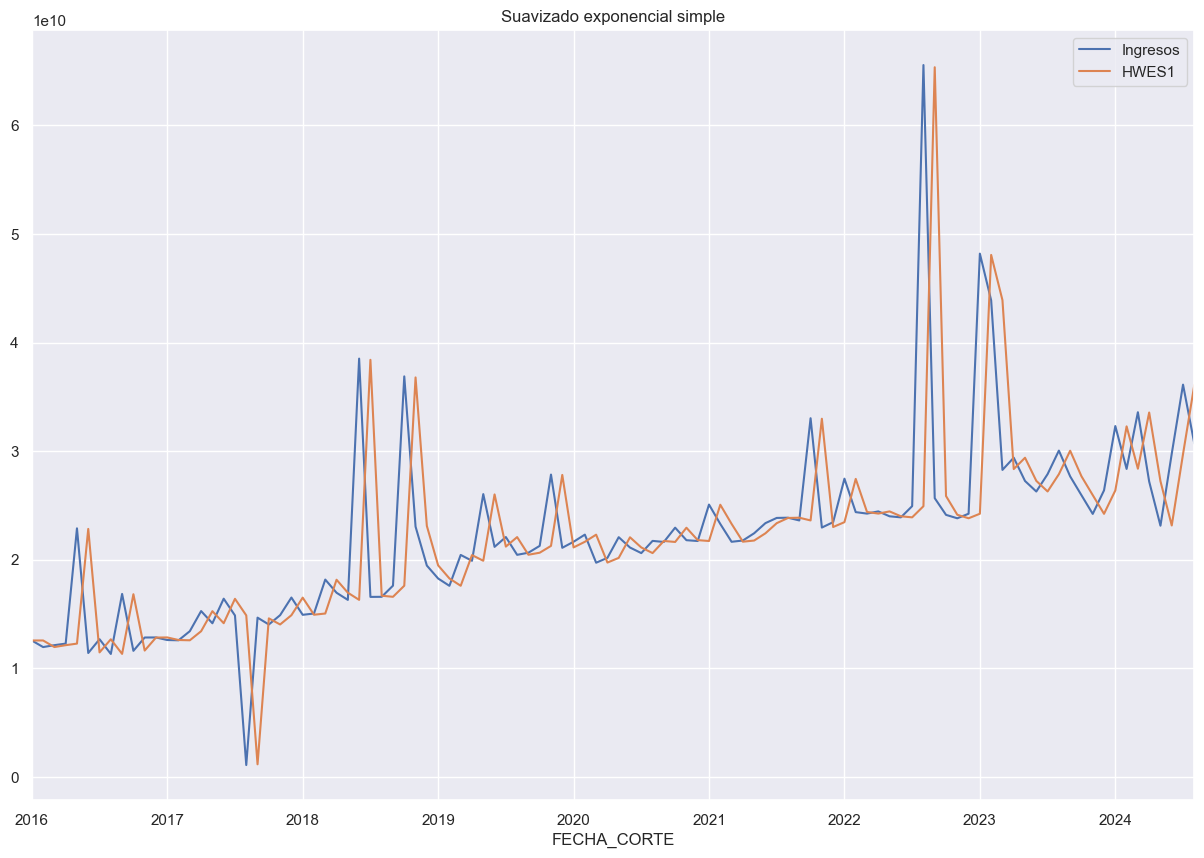

In [87]:
df_s = df_Ingresos.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Ingresos']).fit(smoothing_level = 0.995, optimized=False,use_brute=True).fittedvalues
df_s[['Ingresos','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='FECHA_CORTE'>

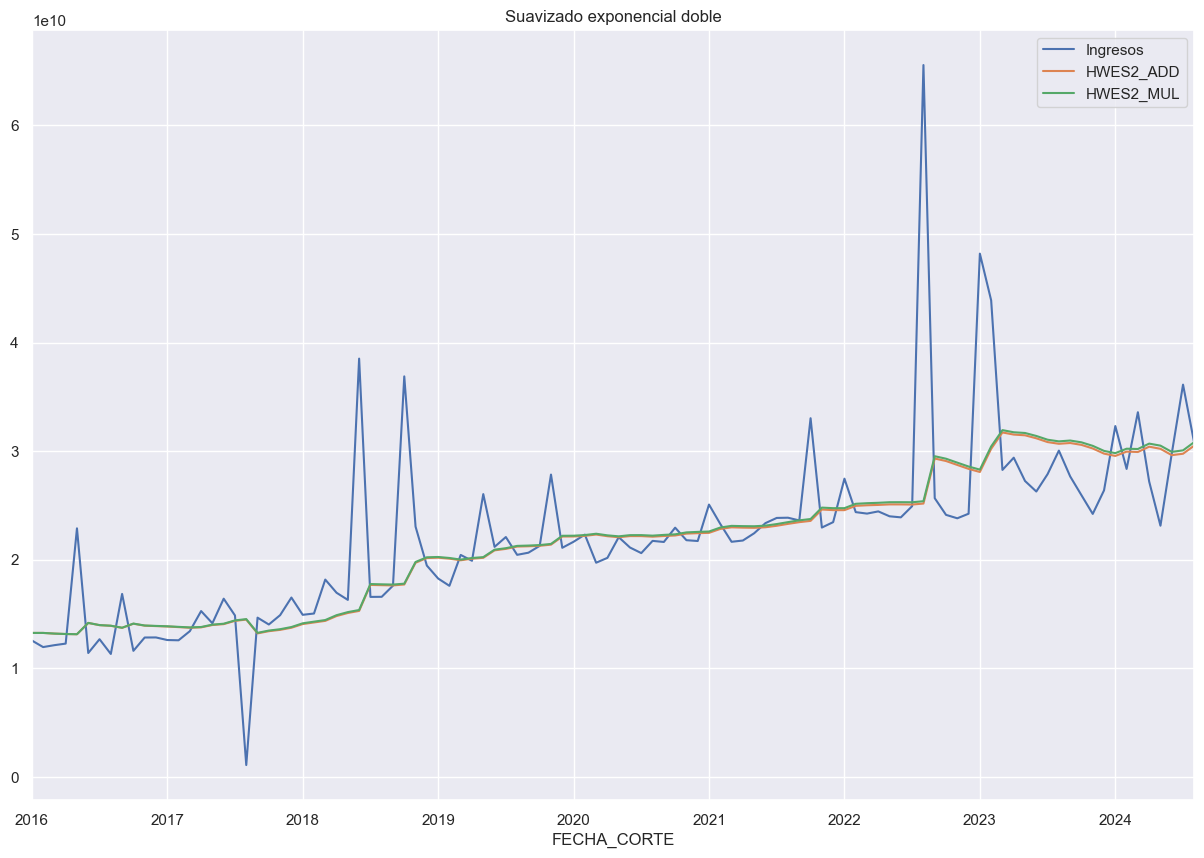

In [92]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Ingresos'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Ingresos'],trend='mul').fit().fittedvalues
df_s[['Ingresos', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='FECHA_CORTE'>

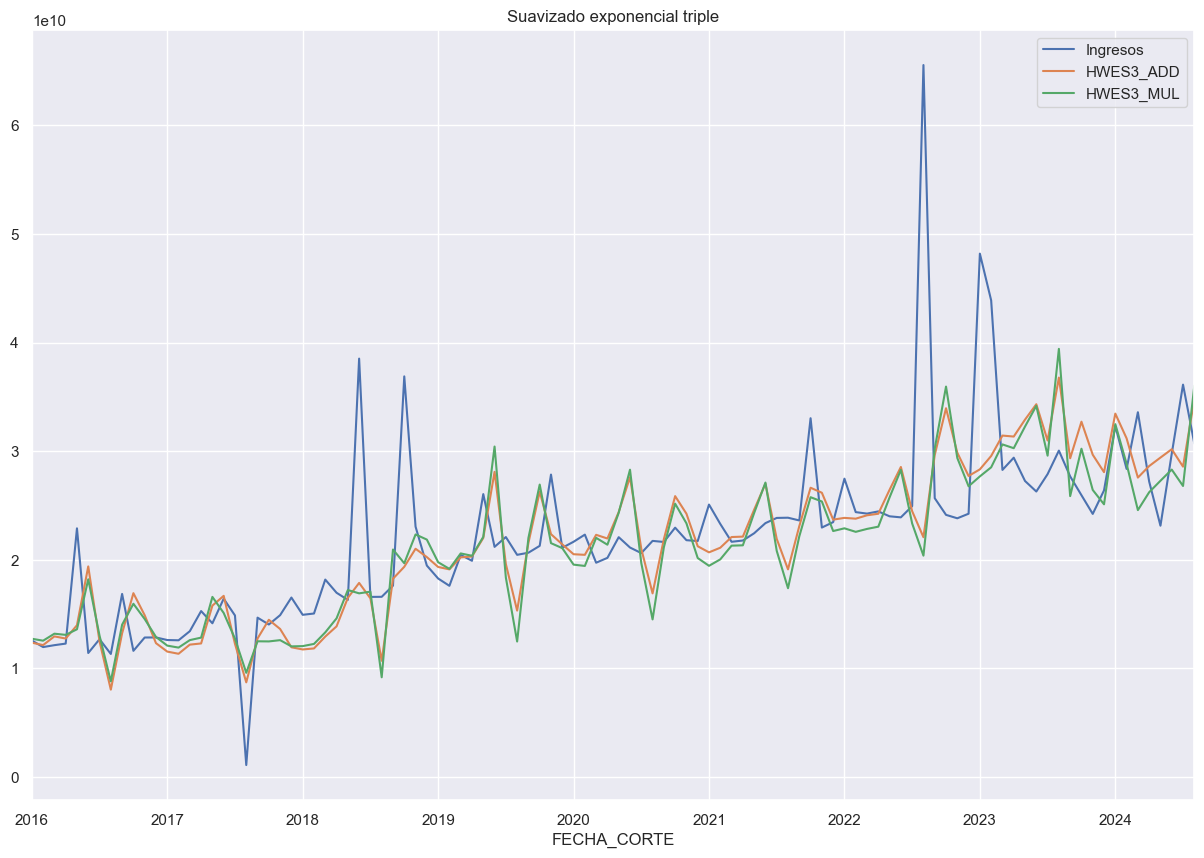

In [93]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Ingresos'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Ingresos'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Ingresos', 'HWES3_ADD','HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [94]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:92]
Prueba_df_s= df_s[92:]

display(Prueba_df_s,Entrenamiento_df_s)

,Ingresos,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2023-09-30,27669222104,3.003394e+10,3.074483e+10,3.097330e+10,2.933956e+10,2.585501e+10
2023-10-31,25937168241,2.768105e+10,3.057223e+10,3.080667e+10,3.270656e+10,3.021798e+10
2023-11-30,24213570242,2.594589e+10,3.024129e+10,3.048287e+10,2.966269e+10,2.642030e+10
2023-12-31,26384328985,2.422223e+10,2.976751e+10,3.001759e+10,2.805856e+10,2.509747e+10
2024-01-31,32307147290,2.637352e+10,2.955372e+10,2.981292e+10,3.345258e+10,3.248276e+10
2024-02-29,28356799879,3.227748e+10,2.995130e+10,3.021878e+10,3.117227e+10,2.882284e+10
2024-03-31,33581415293,2.837640e+10,2.991599e+10,3.019197e+10,2.755936e+10,2.456436e+10
2024-04-30,27195720063,3.355539e+10,3.040569e+10,3.068919e+10,2.862154e+10,2.621274e+10
2024-05-31,23126998775,2.722752e+10,3.021032e+10,3.050202e+10,2.940266e+10,2.726754e+10


,Ingresos,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2016-01-31,12556235614,1.255624e+10,1.325185e+10,1.325185e+10,1.235470e+10,1.271639e+10
2016-02-29,11948803346,1.255624e+10,1.325117e+10,1.325169e+10,1.213102e+10,1.253717e+10
2016-03-31,12124055034,1.195184e+10,1.318925e+10,1.319090e+10,1.293319e+10,1.318050e+10
2016-04-30,12268361877,1.212319e+10,1.315008e+10,1.315334e+10,1.273477e+10,1.307349e+10
2016-05-31,22885166819,1.226764e+10,1.312846e+10,1.313373e+10,1.395959e+10,1.358510e+10
...,...,...,...,...,...,...
2023-04-30,29392342046,2.834453e+10,3.152105e+10,3.173417e+10,3.133829e+10,3.026709e+10
2023-05-31,27246901653,2.938710e+10,3.145442e+10,3.166776e+10,3.289918e+10,3.226098e+10
2023-06-30,26276359798,2.725760e+10,3.117821e+10,3.139345e+10,3.431651e+10,3.416906e+10


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


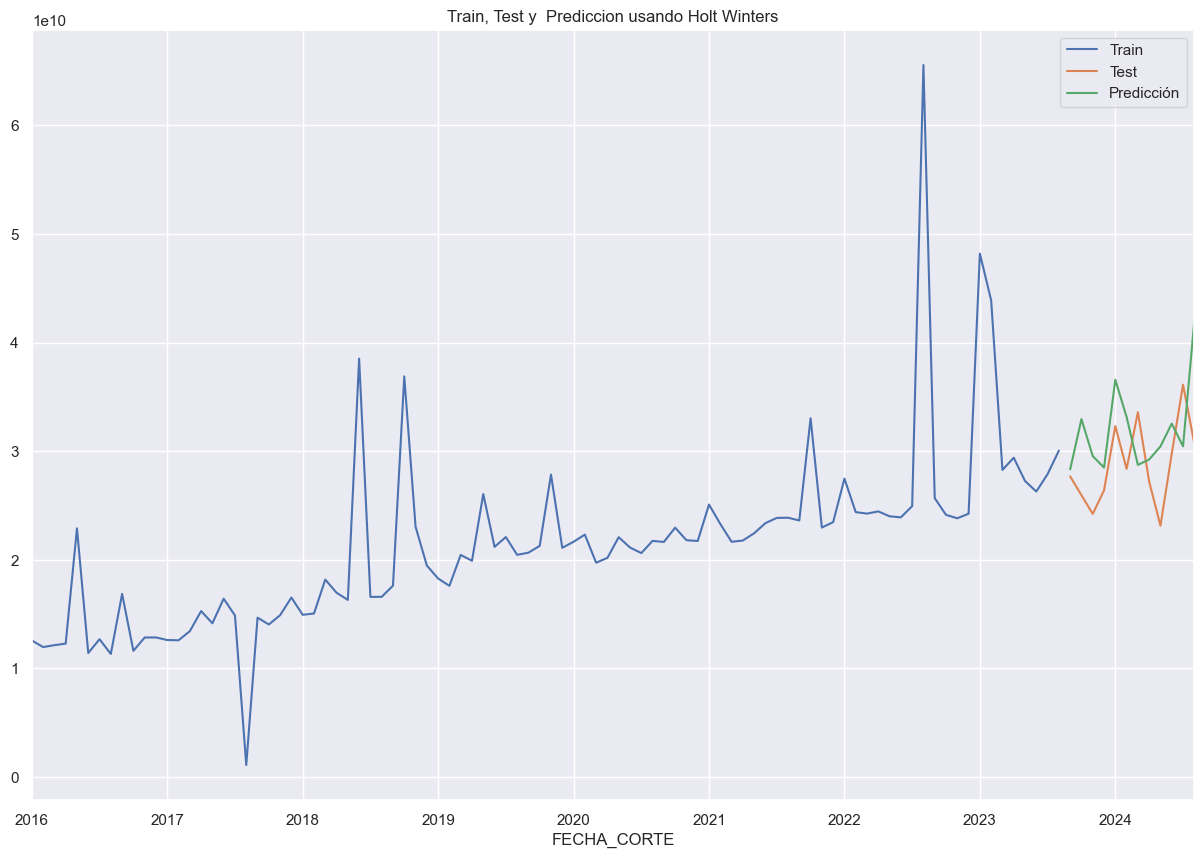

In [95]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Ingresos"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
Entrenamiento_df_s["Ingresos"].plot(legend=True,label="Train")
Prueba_df_s["Ingresos"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='FECHA_CORTE'>

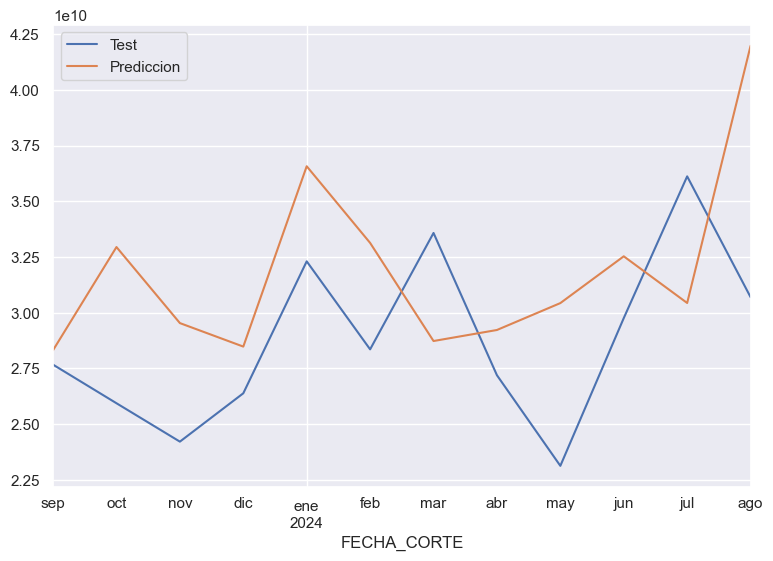

In [97]:
Prueba_df_s['Ingresos'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [99]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Ingresos"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Ingresos'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Ingresos'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Ingresos'], test_predictions)*100:.2f}%")

MAE 4837729671.45
MSE: 30970547348609978368.00
RMSE: 5565118808.13
MAPE: 17.06%


# Prophet

In [ ]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [102]:
df_p = df_Ingresos.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'FECHA_CORTE':'ds','Ingresos':'y'}, inplace=True)
df_p

,ds,y
0,2016-01-31,12556235614
1,2016-02-29,11948803346
2,2016-03-31,12124055034
3,2016-04-30,12268361877
4,2016-05-31,22885166819
...,...,...
99,2024-04-30,27195720063
100,2024-05-31,23126998775
101,2024-06-30,29758712102
102,2024-07-31,36122438899


In [103]:
Entrenamiento_df_p= df_p[:92]
Prueba_df_p= df_p[92:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
87,2023-04-30,29392342046
88,2023-05-31,27246901653
89,2023-06-30,26276359798
90,2023-07-31,27879160011
91,2023-08-31,30044807778


,ds,y
99,2024-04-30,27195720063
100,2024-05-31,23126998775
101,2024-06-30,29758712102
102,2024-07-31,36122438899
103,2024-08-31,30699939540


In [104]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmpt0xnp8wc/zhc2ehsq.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpt0xnp8wc/iw2ugu6m.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1401', 'data', 'file=/tmp/tmpt0xnp8wc/zhc2ehsq.json', 'init=/tmp/tmpt0xnp8wc/iw2ugu6m.json', 'output', 'file=/tmp/tmpt0xnp8wc/prophet_modelg0co2zgv/prophet_model-20241102215412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:54:12 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
21:54:13 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [105]:
future = modelo.make_future_dataframe(periods=15,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-31,1.400780e+10,5.779432e+09,2.134749e+10
1,2016-02-29,1.107487e+10,3.938422e+09,1.879538e+10
2,2016-03-31,1.098222e+10,3.651215e+09,1.883539e+10
3,2016-04-30,1.124207e+10,3.604179e+09,1.863674e+10
4,2016-05-31,1.499451e+10,7.553674e+09,2.223481e+10
...,...,...,...,...
102,2024-07-01,3.148007e+10,2.402864e+10,3.935303e+10
103,2024-08-01,3.413733e+10,2.544851e+10,4.168328e+10
104,2024-09-01,2.276863e+10,1.580551e+10,3.111607e+10
105,2024-10-01,4.205641e+10,3.486026e+10,4.968077e+10


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


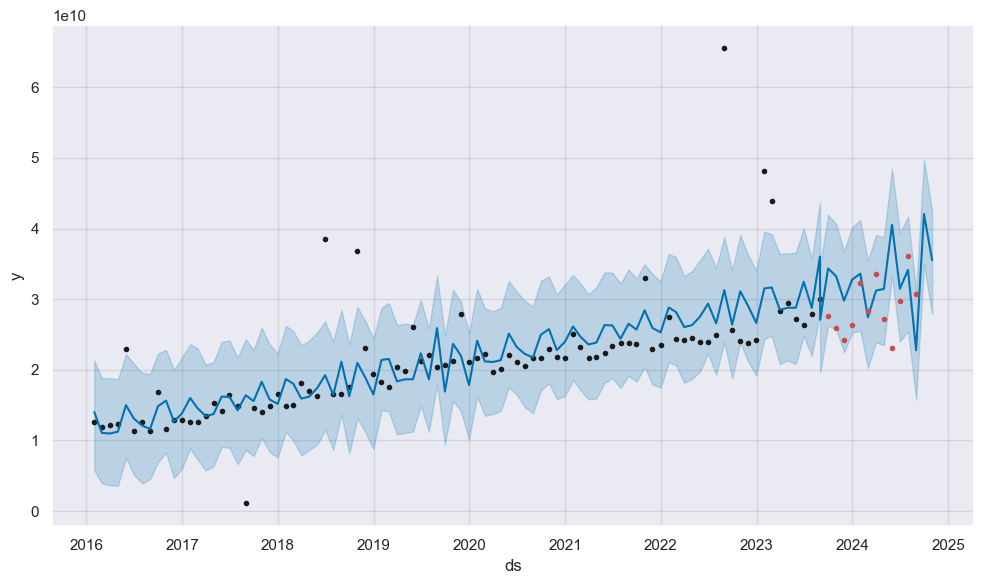

In [106]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

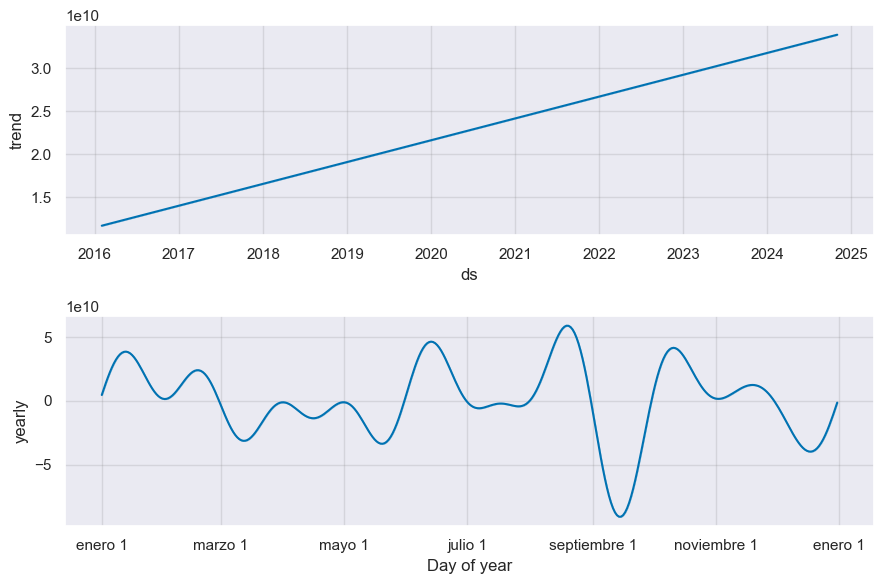

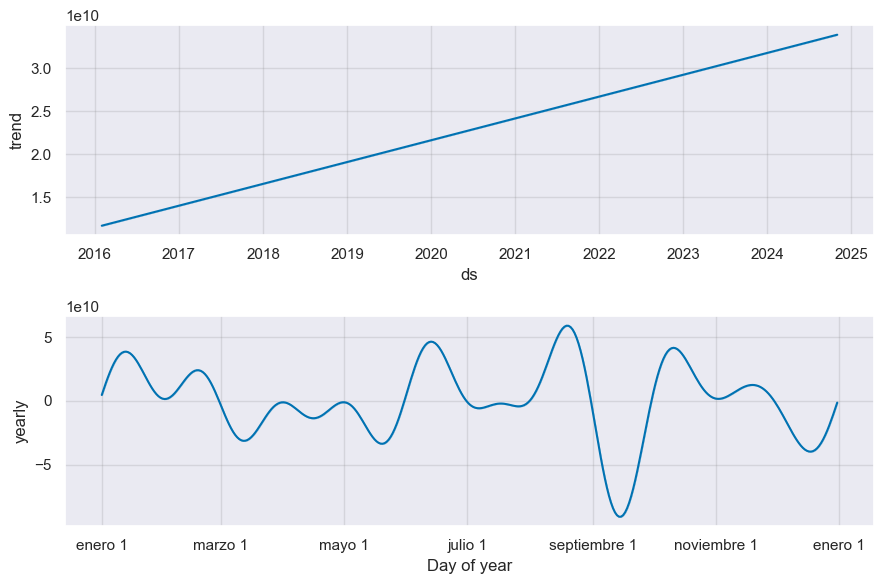

In [107]:
modelo.plot_components(forecast)

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


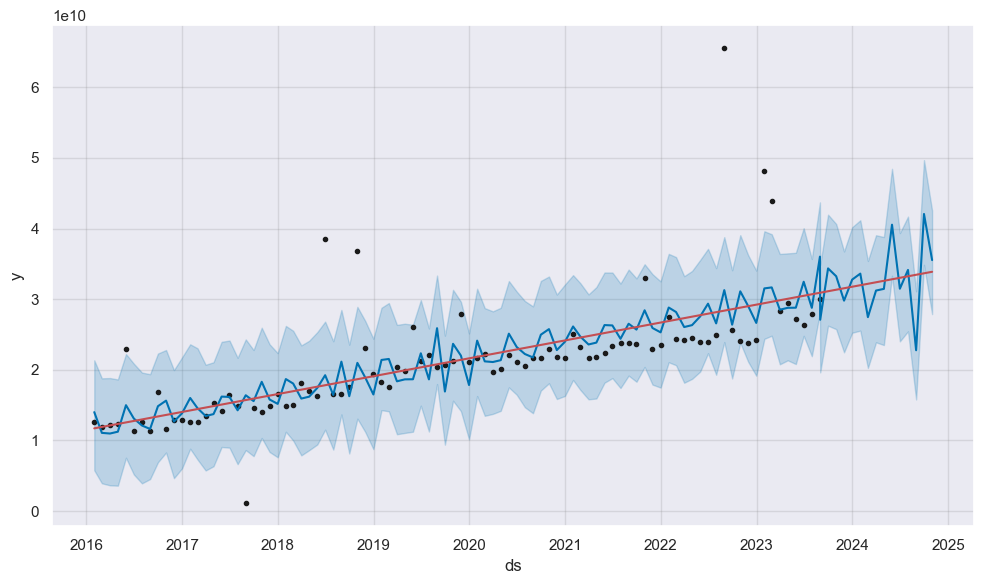

In [108]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

In [109]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv

prophet    INFO  Making 10 forecasts with cutoffs between 2018-03-25 00:00:00 and 2022-08-31 00:00:00
  0%|          | 0/10 [00:00<?, ?it/s]

prophet    INFO  n_changepoints greater than number of observations. Using 19.
cmdstanpy  DEBUG input tempfile: /tmp/tmpt0xnp8wc/0znyz_jz.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpt0xnp8wc/qxdmykem.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24204', 'data', 'file=/tmp/tmpt0xnp8wc/0znyz_jz.json', 'init=/tmp/tmpt0xnp8wc/qxdmykem.json', 'output', 'file=/tmp/tmpt0xnp8wc/prophet_modelozlsex6b/prophet_model-20241102215504.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:55:04 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
21:55:05 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing
 10%|█         | 1/10 [00:00<00:06,  1.39it/s]prophet    INFO  n_changepoints greater than number of observations. Using 24.
cmdstanpy  

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-31,1.167991e+10,1.032890e+10,1.299521e+10,18165617515,2018-03-25
1,2018-04-30,1.771180e+10,1.645363e+10,1.899483e+10,16951898927,2018-03-25
2,2018-05-31,7.593985e+09,6.276976e+09,8.832663e+09,16294556184,2018-03-25
3,2018-06-30,2.534072e+10,2.411651e+10,2.667832e+10,38518014369,2018-03-25
4,2018-07-31,2.129595e+10,2.001464e+10,2.259433e+10,16569647427,2018-03-25
...,...,...,...,...,...,...
115,2023-04-30,2.892546e+10,2.192508e+10,3.598832e+10,29392342046,2022-08-31
116,2023-05-31,2.910600e+10,2.191723e+10,3.637536e+10,27246901653,2022-08-31
117,2023-06-30,3.442709e+10,2.767417e+10,4.176019e+10,26276359798,2022-08-31
118,2023-07-31,2.739956e+10,2.002777e+10,3.483234e+10,27879160011,2022-08-31


In [ ]:
df_per = performance_metrics(df_p_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,40580.017420,201.444825,159.620221,0.202765,0.144416,0.184468,0.660000
1,40 days,40252.592620,200.630488,158.627768,0.202550,0.139147,0.184099,0.660000
2,41 days,39899.919210,199.749641,157.097843,0.201338,0.139147,0.182764,0.660000
3,42 days,42802.733427,206.888215,160.854085,0.205301,0.139147,0.189971,0.660000
4,44 days,43365.109498,208.242910,162.312919,0.202887,0.139147,0.186950,0.640000
...,...,...,...,...,...,...,...,...
259,359 days,71889.477471,268.122132,205.638684,0.237451,0.199522,0.235550,0.566667
260,360 days,70130.563146,264.821757,205.210208,0.234572,0.205479,0.235969,0.550000
261,363 days,69057.870687,262.788643,200.917402,0.229053,0.191859,0.230967,0.560000
262,364 days,71092.884134,266.632489,203.667278,0.226441,0.191859,0.230313,0.540000


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


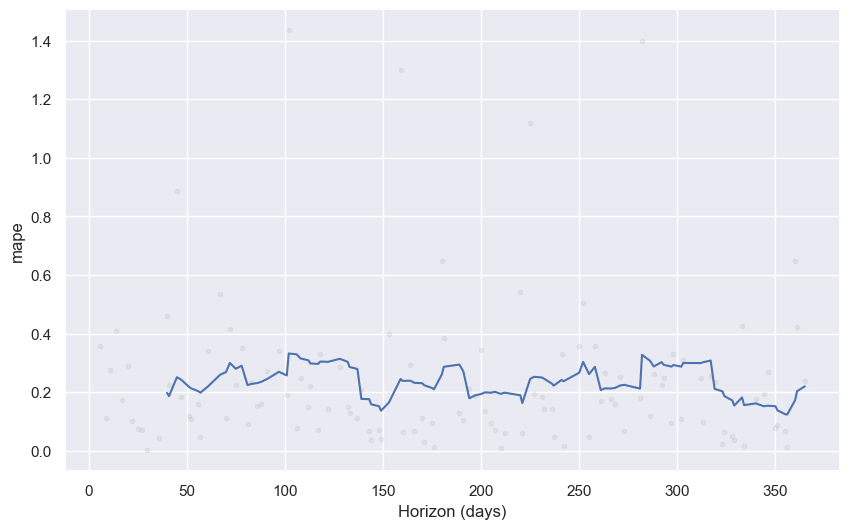

In [110]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')